In [1]:
import pandas as pd


In [2]:
d1=pd.read_csv('survey_results_public.csv')
d1

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,88377,NaN,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,"Not employed, and not looking for work",Canada,No,Primary/elementary school,NaN,...,NaN,Tech articles written by other developers;Tech...,NaN,Man,No,NaN,NaN,No,Appropriate in length,Easy
88879,88601,NaN,No,Never,The quality of OSS and closed source software ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88880,88802,NaN,No,Never,NaN,Employed full-time,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88881,88816,NaN,No,Never,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
d2 = pd.read_csv('Countries-Continents.csv')
d2

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


# Find the average age of developers when they wrote their first line of code

In [5]:
null_values = d1['Age1stCode'].isnull()
null_values

0        False
1        False
2        False
3        False
4        False
         ...  
88878     True
88879     True
88880     True
88881     True
88882    False
Name: Age1stCode, Length: 88883, dtype: bool

In [6]:
d1.dropna(subset=['Age1stCode'], inplace=True)

In [7]:
d1['Age1stcode'] = pd.to_numeric(d1['Age1stCode'], errors='coerce')

In [8]:
data_type = d1['Age1stCode'].dtype
data_type

dtype('O')

In [9]:
print('The average age of developers when they wrote their first line of code is',d1['Age1stcode'].mean())


The average age of developers when they wrote their first line of code is 15.456446353114092


# Deduce the percentage of developers who know python in each country.

In [10]:
python_developers = d1[d1['LanguageWorkedWith'].str.contains('Python', na=False)]


percentage_python_by_country = (python_developers['Country'].value_counts() / d1['Country'].value_counts())* 100
top_10_countries = percentage_python_by_country.nlargest(10)
print('Percentage of developers who know python in each country.')
print()
print(top_10_countries)


Percentage of developers who know python in each country.

Dominica                 100.000000
Niger                    100.000000
Sao Tome and Principe    100.000000
Timor-Leste              100.000000
Turkmenistan              85.714286
Mauritania                71.428571
Bahamas                   66.666667
Guinea                    66.666667
Guyana                    66.666667
Uganda                    64.285714
Name: Country, dtype: float64


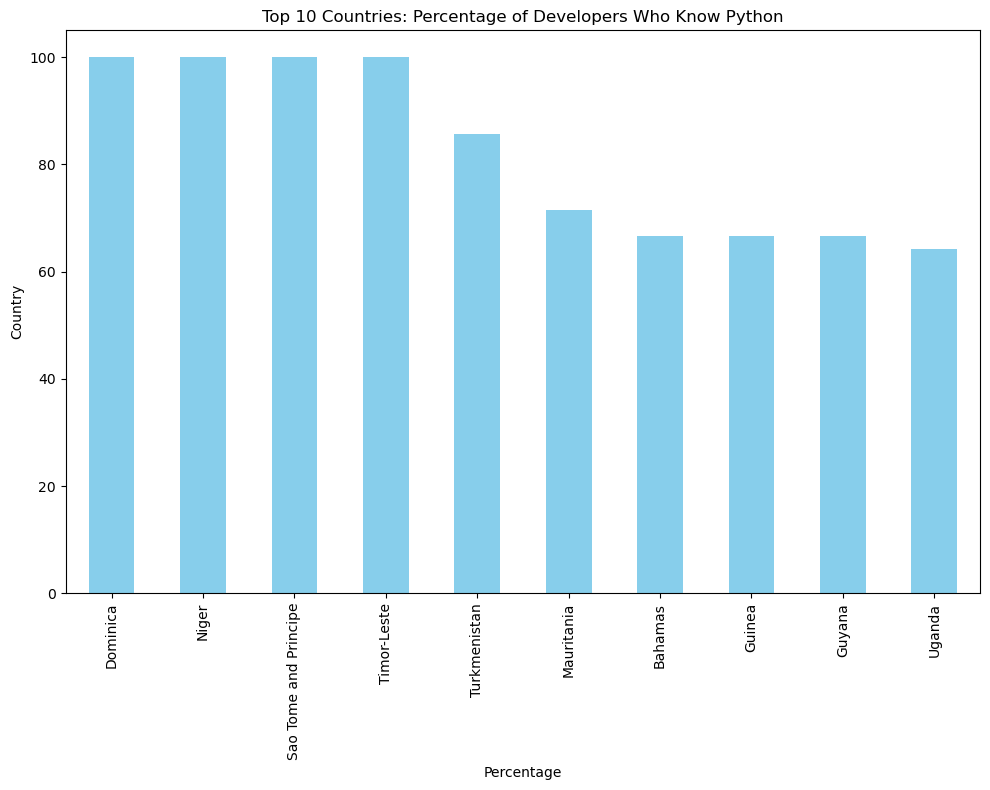

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
top_10_countries.plot(kind='bar', color='skyblue')
plt.xlabel('Percentage')
plt.ylabel('Country')
plt.title('Top 10 Countries: Percentage of Developers Who Know Python')
plt.tight_layout()
plt.show()


# In which countries do developers work the highest number of hours per week? Consider 
countries with more than 250 responses only.


In [12]:

country_counts = d1['Country'].value_counts()
countries_over_250 = country_counts[country_counts > 250].index
filtered_d1 = d1[d1['Country'].isin(countries_over_250)]


average_hours_per_country = filtered_d1.groupby('Country')['WorkWeekHrs'].max()

sorted_average_hours = average_hours_per_country.sort_values(ascending=False)

top_countries = sorted_average_hours

print('Top countries are:')
top_countries.head(10)


Top countries are:


Country
India          4850.0
Switzerland    4125.0
Sweden         3875.0
Sri Lanka      1012.0
Turkey          475.0
Brazil          425.0
Austria         425.0
Poland          425.0
Germany         425.0
Spain           415.0
Name: WorkWeekHrs, dtype: float64

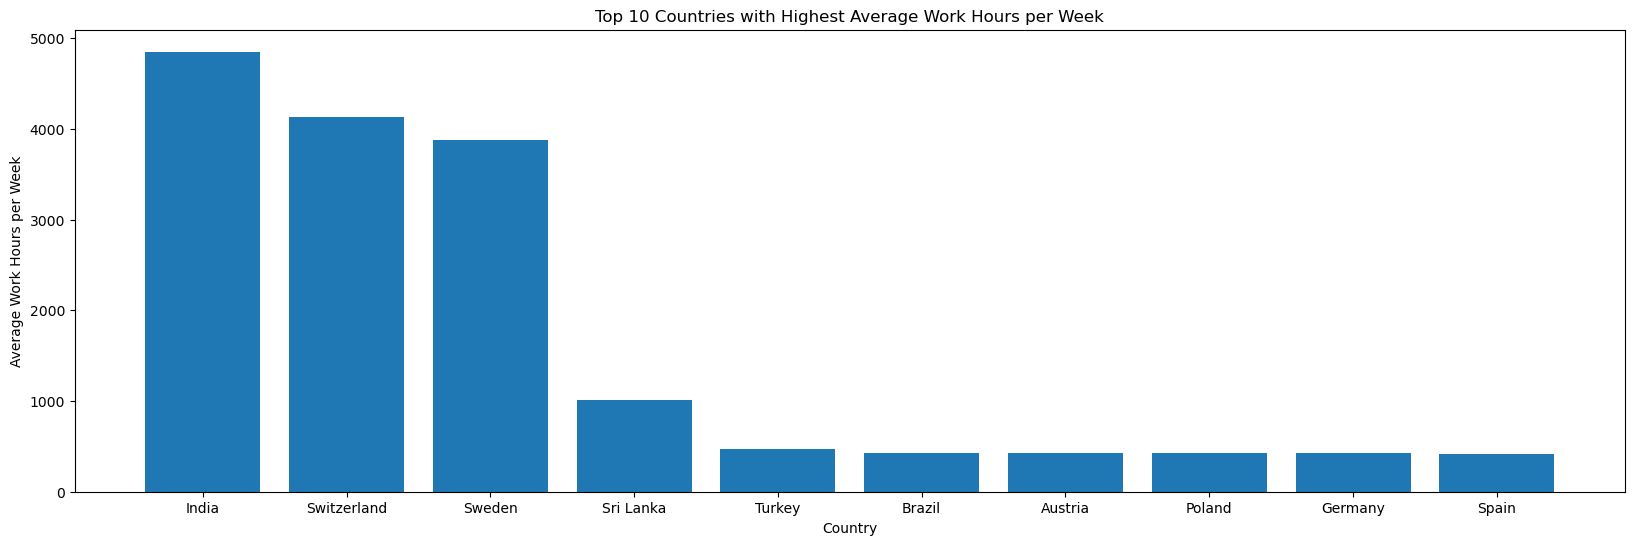

In [13]:
plt.figure(figsize=(20,6))
plt.bar(top_countries.index[:10], top_countries.values[:10])
plt.xlabel('Country')
plt.ylabel('Average Work Hours per Week')
plt.title('Top 10 Countries with Highest Average Work Hours per Week')
plt.show()

# Based on this survey, what will be the most desired programming language for the year 2020


In [14]:
desired_languages_2020 = d1['LanguageDesireNextYear'].str.split(';', expand=True).stack()
most_desired_lang = desired_languages_2020.value_counts().idxmax()
print('The most desired programming language for the year 2020 is',most_desired_lang)

The most desired programming language for the year 2020 is JavaScript


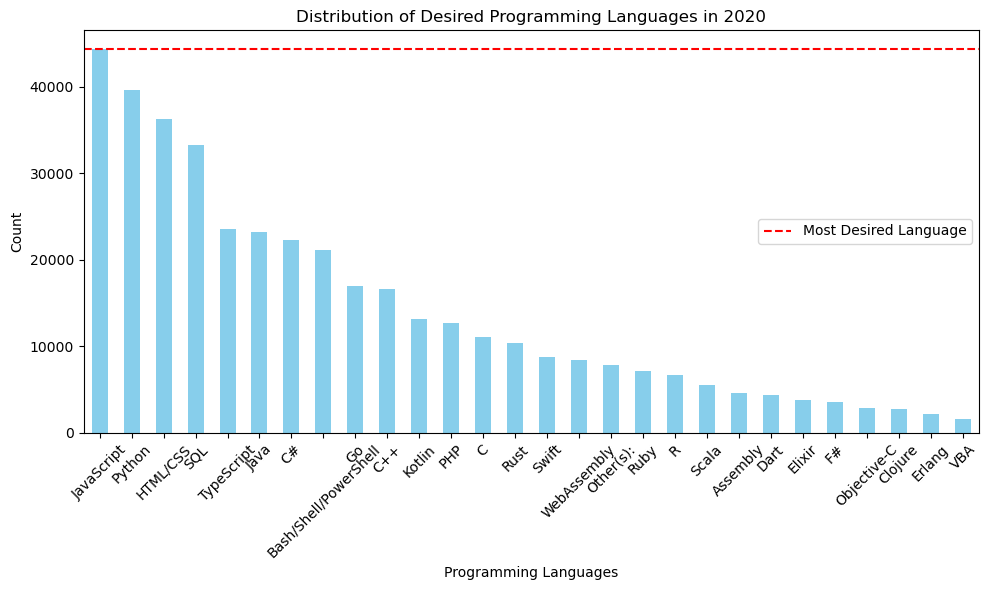

In [15]:
import matplotlib.pyplot as plt
language_counts = desired_languages_2020.value_counts()
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Programming Languages')
plt.ylabel('Count')
plt.title('Distribution of Desired Programming Languages in 2020')
plt.xticks(rotation=45)
plt.tight_layout()
plt.axhline(y=language_counts[most_desired_lang], color='red', linestyle='--', label='Most Desired Language')
plt.legend()
plt.show()


# What is the distribution of people who code as a hobby based on gender and continent
(hint: use your mapping of country to continent)?

In [16]:
d1 = d1.merge(d2[['Country', 'Continent']], on='Country', how='left')
d1.Hobbyist = d1.Hobbyist.replace({"Yes": 1, "No": 0})
def sex(string):
    if string == 'Man':
        return 'Man'
    elif string == 'Woman':
        return 'Woman'
    else:
        return "Others"
d1.Gender = list(map(sex,d1.Gender))
grouped_data=d1.groupby(['Continent','Gender'])['Hobbyist'].count() 
grouped_data

Continent      Gender
Africa         Man        2304
               Others      110
               Woman       189
Asia           Man       16443
               Others     1087
               Woman      1160
Europe         Man       29993
               Others     1222
               Woman      2034
North America  Man        3937
               Others      187
               Woman       368
Oceania        Man        2145
               Others      120
               Woman       142
South America  Man        3162
               Others       79
               Woman       180
Name: Hobbyist, dtype: int64

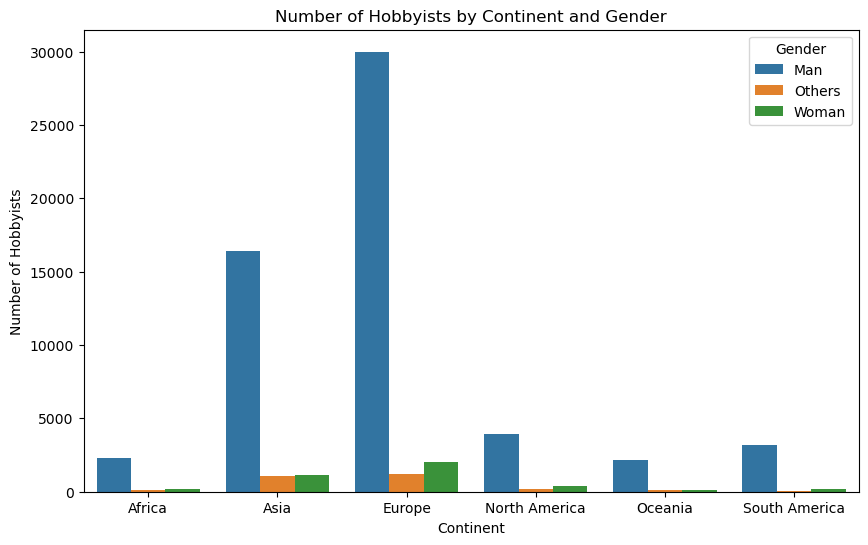

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
grouped_data = d1.groupby(['Continent', 'Gender'])['Hobbyist'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='Hobbyist', hue='Gender', data=grouped_data)
plt.xlabel('Continent')
plt.ylabel('Number of Hobbyists')
plt.title('Number of Hobbyists by Continent and Gender')
plt.show()


# Generate the report for job and career satisfaction of developer based on their gender and continent?


In [18]:
d1.groupby(['Continent','Gender','JobSat'])['Respondent'].count()


Continent      Gender  JobSat                            
Africa         Man     Neither satisfied nor dissatisfied    225
                       Slightly dissatisfied                 252
                       Slightly satisfied                    513
                       Very dissatisfied                     129
                       Very satisfied                        338
                                                            ... 
South America  Woman   Neither satisfied nor dissatisfied     20
                       Slightly dissatisfied                  21
                       Slightly satisfied                     50
                       Very dissatisfied                      11
                       Very satisfied                         43
Name: Respondent, Length: 90, dtype: int64

In [19]:
d1.groupby(['Continent','Gender','CareerSat'])['Respondent'].count()


Continent      Gender  CareerSat                         
Africa         Man     Neither satisfied nor dissatisfied    199
                       Slightly dissatisfied                 172
                       Slightly satisfied                    537
                       Very dissatisfied                     123
                       Very satisfied                        556
                                                            ... 
South America  Woman   Neither satisfied nor dissatisfied     13
                       Slightly dissatisfied                  25
                       Slightly satisfied                     56
                       Very dissatisfied                       7
                       Very satisfied                         52
Name: Respondent, Length: 90, dtype: int64